# Helmholtz 1D - Correlations between Variables


In [33]:
import logging
import numpy as np
import helmholtz as hm
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics.pairwise
import sys
from numpy.ma.testutils import assert_array_almost_equal
from numpy.linalg import eig, norm

%load_ext autoreload
%autoreload 2

np.set_printoptions(linewidth=500, precision=2, suppress=True)
for handler in logging.root.handlers[:]: logging.root.removeHandler(handler)
logging.basicConfig(stream=sys.stdout, level=logging.DEBUG, format="%(levelname)-8s %(message)s",
                    datefmt="%a, %d %b %Y %H:%M:%S")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
n = 32
kh = 2*np.pi/n
print(n, kh)

a = hm.linalg.helmholtz_1d_5_point_operator(kh, n)
x, multilevel = helmholtz.repetitive.bootstrap_repetitive.generate_test_matrix(a, 0, num_examples=4, num_sweeps=100, num_bootstrap_steps=2)

level = multilevel.finest_level
coarse_level = multilevel.level[1]
coarse_level.print()

32 0.19634954084936207
INFO     Smallest domain size 32, bootstrap with 2 levels
INFO     Bootstrap step 1/2
INFO     Relax at level 0
DEBUG        0 |r| 1.55149353e+00 RER 3.08064
DEBUG       10 |r| 1.15910115e-01 (0.90227) RER 0.11591 (0.90227) 1.00000
DEBUG       20 |r| 7.66547118e-02 (0.98098) RER 0.07665 (0.98098) 1.00000
DEBUG       30 |r| 6.84322192e-02 (0.99225) RER 0.06843 (0.99225) 1.00000
DEBUG       40 |r| 6.46060707e-02 (0.99557) RER 0.06461 (0.99557) 1.00000
DEBUG       50 |r| 6.23470671e-02 (0.99695) RER 0.06235 (0.99695) 1.00000
DEBUG       60 |r| 6.06401889e-02 (0.99738) RER 0.06064 (0.99738) 1.00000
DEBUG       70 |r| 5.91262446e-02 (0.99753) RER 0.05913 (0.99753) 1.00000
DEBUG       80 |r| 5.77086042e-02 (0.99761) RER 0.05771 (0.99761) 1.00000
DEBUG       90 |r| 5.63622483e-02 (0.99767) RER 0.05636 (0.99767) 1.00000
DEBUG      100 |r| 5.50756197e-02 (0.99771) RER 0.05508 (0.99771) 1.00000
INFO     Coarsening level 0->1
DEBUG    SVD  8 x  2 nc 1 cr 0.50 error 0.052 Si

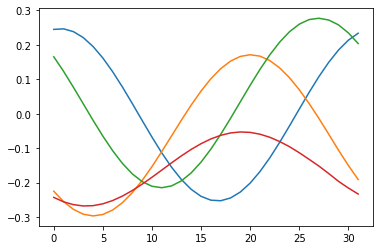

In [25]:
for i in range(x.shape[1]):
    plt.plot(x[:, i])

In [26]:
aggregate_size = n
x_aggregate_t = np.concatenate(
    tuple(hm.linalg.get_window(x, offset, aggregate_size) for offset in range(n)), axis=1).transpose()
print("Test Matrix dimension, ", x.shape)
print("Window matrix dimension", x_aggregate_t.shape)

Test Matrix dimension,  (32, 4)
Window matrix dimension (128, 32)


In [35]:
d = sklearn.metrics.pairwise.cosine_similarity(x_aggregate_t, x_aggregate_t)
print("(x, x) cos similarity")
print(d)

(x, x) cos similarity
[[ 1.   -0.73  0.42 ... -0.6   0.59 -0.31]
 [-0.73  1.    0.14 ...  0.98 -0.04  0.72]
 [ 0.42  0.14  1.   ...  0.31  0.98 -0.05]
 ...
 [-0.6   0.98  0.31 ...  1.    0.14  0.72]
 [ 0.59 -0.04  0.98 ...  0.14  1.   -0.13]
 [-0.31  0.72 -0.05 ...  0.72 -0.13  1.  ]]


[ 1.   -0.73  0.42 -0.36  0.98 -0.83  0.24 -0.39  0.92 -0.89  0.05 -0.41  0.83 -0.93 -0.14 -0.41  0.71 -0.92 -0.33 -0.39  0.56 -0.88 -0.51 -0.36  0.38 -0.81 -0.66 -0.32  0.2  -0.7  -0.79 -0.26  0.   -0.57 -0.89 -0.19 -0.19 -0.41 -0.96 -0.11 -0.38 -0.24 -0.99 -0.03 -0.55 -0.06 -0.98  0.05 -0.71  0.12 -0.93  0.14 -0.83  0.3  -0.85  0.21 -0.92  0.47 -0.74  0.28 -0.98  0.62 -0.59  0.35 -1.    0.74 -0.43  0.39 -0.98  0.84 -0.25  0.43 -0.92  0.91 -0.06  0.44 -0.83  0.94  0.14  0.45 -0.71  0.94  0.32
  0.43 -0.55  0.9   0.5   0.4  -0.38  0.82  0.65  0.35 -0.19  0.72  0.78  0.29  0.    0.58  0.88  0.23  0.2   0.43  0.95  0.15  0.38  0.26  0.98  0.07  0.56  0.08  0.97 -0.02  0.71 -0.11  0.92 -0.1   0.83 -0.28  0.84 -0.18  0.92 -0.45  0.73 -0.25  0.98 -0.6   0.59 -0.31]


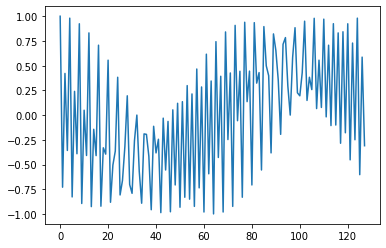

In [36]:
plt.plot(d[0])
print(d[0])

There